* Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score


* Loading the dataset and printing the first 5 rows of the dataset

In [2]:
data =  pd.read_csv('Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


* Checking Basic statistics of the dataset

* Checking for NAN values

In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

* Displaying dimensions of the dataframe

In [9]:
data.shape

(400, 5)

* Loading 'Age', 'Estimated_salary' as the features in 'x' and 'Purchased' as the target variable in 'y'

In [10]:
x = data.iloc[:,2:4]

In [11]:
y = data.iloc[:,4]


* Spliting data into 75% training and 25% testing data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

* Using the StandardScaler to standardize the values

In [13]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

* Preparing and Training our Logistic Regression model with the training and testing data

In [14]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [15]:
print('Expected Output:',pred[:10])
print('-'*15)
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]
---------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


* Evaluating the model based on confusion matrix

In [16]:

matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[61  2]
 [12 25]]


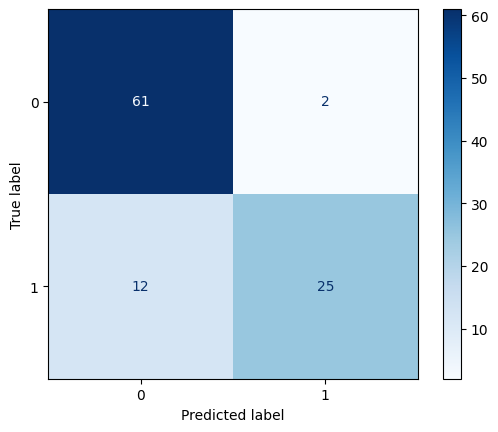

In [17]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

* Determining the Accuracy,Error Rate,Recall,Precision of the model

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [19]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate:',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity:',tp/(tp+fn))
print('Specificity:',tn/(fp+tn))
print('Precision:',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.86
Error Rate: 0.14
Sensitivity: 0.6756756756756757
Specificity: 0.9682539682539683
Precision: 0.9259259259259259
False Positive Rate : 0.031746031746031744
